# LASSO for Feature Selection

In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [1]:
import pandas as pd
import numpy as np
import requests, zipfile, io, os
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns


# classifiers
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


# evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# load gene expression as a csv file
exp_df = pd.read_csv("E:/2023-09-27-Moslehi-scrnaseq/data/GSE148842_RAW/GSM4483741_PW029-701.cts/GSM4483741_PW029-701.cts.csv")

In [3]:
exp_df

,genes,Astrocyte,Astrocyte.1,Astrocyte.2,Astrocyte.3,Astrocyte.4,Astrocyte.5,Astrocyte.6,Astrocyte.7,Astrocyte.8,...,Astrocyte.1643,Astrocyte.1644,Astrocyte.1645,Astrocyte.1646,Astrocyte.1647,Astrocyte.1648,Astrocyte.1649,Astrocyte.1650,Astrocyte.1651,Astrocyte.1652
0,1-Dec,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1-Mar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1-Sep,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10-Mar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10-Sep,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58815,snoZ278,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58816,snoZ40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58817,snoZ6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58818,snosnR66,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
exp_df.columns = [''] * len(exp_df.columns)

In [6]:
df = exp_df.transpose()

In [7]:
df

,0,1,2,3,4,5,6,7,8,9,...,58810,58811,58812,58813,58814,58815,58816,58817,58818,58819
,1-Dec,1-Mar,1-Sep,10-Mar,10-Sep,11-Mar,11-Sep,12-Sep,14-Sep,15-Sep,...,snoU18,snoU2-30,snoU2_19,snoU83B,snoZ196,snoZ278,snoZ40,snoZ6,snosnR66,yR211F11.2
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df.columns = df.iloc[0]

In [9]:
df

,1-Dec,1-Mar,1-Sep,10-Mar,10-Sep,11-Mar,11-Sep,12-Sep,14-Sep,15-Sep,...,snoU18,snoU2-30,snoU2_19,snoU83B,snoZ196,snoZ278,snoZ40,snoZ6,snosnR66,yR211F11.2
,1-Dec,1-Mar,1-Sep,10-Mar,10-Sep,11-Mar,11-Sep,12-Sep,14-Sep,15-Sep,...,snoU18,snoU2-30,snoU2_19,snoU83B,snoZ196,snoZ278,snoZ40,snoZ6,snosnR66,yR211F11.2
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# drop first row
df1 = df.iloc[1:, :]

In [11]:
df1

,1-Dec,1-Mar,1-Sep,10-Mar,10-Sep,11-Mar,11-Sep,12-Sep,14-Sep,15-Sep,...,snoU18,snoU2-30,snoU2_19,snoU83B,snoZ196,snoZ278,snoZ40,snoZ6,snosnR66,yR211F11.2
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X = df1.values

In [13]:
#labels
labels = pd.read_csv("E:/2023-09-27-Moslehi-scrnaseq/data/GSE148842_RAW/GSM4483741_PW029-701.cts/labels1.csv")

In [14]:
labels

,labels
0,0
1,0
2,0
3,0
4,0
...,...
1691,0
1692,0
1693,0
1694,0


In [15]:
targets = labels["labels"].values

In [16]:
targets

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [17]:
targets.shape

(1696,)

In [18]:
X_scaled = StandardScaler().fit_transform(X)

In [19]:
# train test split of the data set
# fitting the transformer and then return the transformed training instances
#targets = LabelEncoder().fit_transform(targets)

X_scaled = StandardScaler().fit_transform(df1)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, targets, random_state=42)

In [20]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [21]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [22]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END .................model__alpha=0.1;, score=-0.034 total time=   2.3s
[CV 2/5] END .................model__alpha=0.1;, score=-0.019 total time=   1.5s
[CV 3/5] END .................model__alpha=0.1;, score=-0.038 total time=   1.4s
[CV 4/5] END .................model__alpha=0.1;, score=-0.027 total time=   1.5s
[CV 5/5] END .................model__alpha=0.1;, score=-0.012 total time=   1.4s
[CV 1/5] END .................model__alpha=0.2;, score=-0.034 total time=   1.5s
[CV 2/5] END .................model__alpha=0.2;, score=-0.019 total time=   1.5s
[CV 3/5] END .................model__alpha=0.2;, score=-0.038 total time=   1.4s
[CV 4/5] END .................model__alpha=0.2;, score=-0.027 total time=   1.6s
[CV 5/5] END .................model__alpha=0.2;, score=-0.012 total time=   1.5s
[CV 1/5] END .model__alpha=0.30000000000000004;, score=-0.034 total time=   1.4s
[CV 2/5] END .model__alpha=0.30000000000000004;

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [107]:
search.best_params_# {'model__alpha': 1.2000000000000002}

{'model__alpha': 0.1}

In [108]:
#Now, we have to get the values of the coefficients of Lasso regression.

coefficients = search.best_estimator_.named_steps['model'].coef_

In [109]:
#The importance of a feature is the absolute value of its coefficient, so:

importance = np.abs(coefficients)

In [110]:
importance

array([0., 0., 0., ..., 0., 0., 0.])

In [115]:
# Create an empty list
genes = []
for col in df1.columns:
    genes.append(str(col))
    
print(genes)

['1-Dec', '1-Mar', '1-Sep', '10-Mar', '10-Sep', '11-Mar', '11-Sep', '12-Sep', '14-Sep', '15-Sep', '2-Mar', '2-Sep', '3-Mar', '3-Sep', '4-Mar', '4-Sep', '5-Mar', '5-Sep', '5S_rRNA', '5_8S_rRNA', '6-Mar', '6-Sep', '7-Mar', '7-Sep', '7SK', '8-Mar', '8-Sep', '9-Mar', '9-Sep', 'A1BG', 'A1BG-AS1', 'A1CF', 'A2M', 'A2M-AS1', 'A2ML1', 'A2ML1-AS1', 'A2ML1-AS2', 'A2MP1', 'A3GALT2', 'A4GALT', 'A4GNT', 'AA06', 'AAAS', 'AACS', 'AACSP1', 'AADAC', 'AADACL2', 'AADACL2-AS1', 'AADACL3', 'AADACL4', 'AADACP1', 'AADAT', 'AAED1', 'AAGAB', 'AAK1', 'AAMDC', 'AAMP', 'AANAT', 'AAR2', 'AARD', 'AARS', 'AARS2', 'AARSD1', 'AARSP1', 'AASDH', 'AASDHPPT', 'AASS', 'AATBC', 'AATF', 'AATK', 'AATK-AS1', 'AB015752.3', 'AB019438.66', 'AB019440.50', 'AB019441.29', 'ABALON', 'ABAT', 'ABBA01037345.1', 'ABBA01037346.1', 'ABBA01037349.1', 'ABC11-4932300O16.1', 'ABC12-47043100G14.2', 'ABC12-47964100C23.1', 'ABC12-49244600F4.4', 'ABC7-42391500H16.4', 'ABC7-42404400C24.1', 'ABC7-42418200C9.1', 'ABC7-481722F1.1', 'ABC7-481722F1.2', '

In [118]:
len(genes)

58820

In [117]:
np.array(genes)[importance > 0]

array([], dtype='<U22')

Features Selected

# Draw Plot For Feature LASSO

To have graphs

In [119]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model = LassoCV(cv=3, random_state=0, max_iter=10000)

# Fit model
model.fit(X_train, y_train)

LassoCV(cv=3, max_iter=10000, random_state=0)

In [120]:
#Show best value of penalization chosen by cross validation:

model.alpha_

0.041951030938837126

In [121]:
# Best model

#Use best value for our final model:

# Set best alpha
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train, y_train)

Lasso(alpha=0.041951030938837126)

In [122]:
#Show model coefficients and names:

print(list(zip(lasso_best.coef_, X)))

[(-0.0, array([0, 0, 0, ..., 0, 0, 0], dtype=object)), (-0.0, array([0, 0, 0, ..., 0, 0, 0], dtype=object)), (0.0, array([0, 0, 0, ..., 0, 0, 0], dtype=object)), (0.0, array([0, 0, 0, ..., 0, 0, 0], dtype=object)), (-0.0, array([0, 0, 0, ..., 0, 0, 0], dtype=object)), (0.0, array([0, 0, 0, ..., 0, 0, 0], dtype=object)), (-0.0, array([0, 0, 0, ..., 0, 0, 0], dtype=object)), (-0.0, array([0, 0, 0, ..., 0, 0, 0], dtype=object)), (0.0, array([0, 0, 0, ..., 0, 0, 0], dtype=object)), (-0.0, array([0, 0, 0, ..., 0, 0, 0], dtype=object)), (-0.0, array([0, 0, 0, ..., 0, 0, 0], dtype=object)), (-0.0, array([0, 0, 0, ..., 0, 0, 0], dtype=object)), (0.0, array([0, 0, 0, ..., 0, 0, 0], dtype=object)), (-0.0, array([0, 0, 0, ..., 0, 0, 0], dtype=object)), (-0.0, array([0, 0, 0, ..., 0, 0, 0], dtype=object)), (-0.0, array([0, 0, 0, ..., 0, 0, 0], dtype=object)), (-0.0, array([0, 0, 0, ..., 0, 0, 0], dtype=object)), (-0.0, array([0, 0, 0, ..., 0, 0, 0], dtype=object)), (0.0, array([0, 0, 0, ..., 0, 0,

In [123]:
#Model evaluation

print('R squared training set', round(lasso_best.score(X_train, y_train)*100, 2))
print('R squared test set', round(lasso_best.score(X_test, y_test)*100, 2))

R squared training set 0.0
R squared test set -0.15


In [124]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
reg = Lasso(alpha=1)
reg.fit(X_train, y_train)
mean_squared_error(y_test, lasso_best.predict(X_test))

0.020806138997666226

In [125]:
# Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))

# Test data
pred = reg.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 2))

MSE training set 0.03
MSE test set 0.02


 Role of alpha

To better understand the role of alpha, we plot the lasso coefficients as a function of alpha (max_iter are the maximum number of iterations):

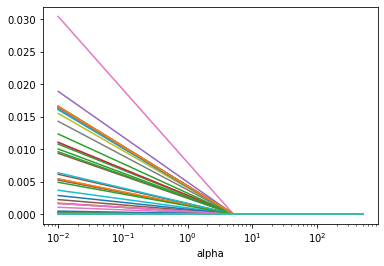

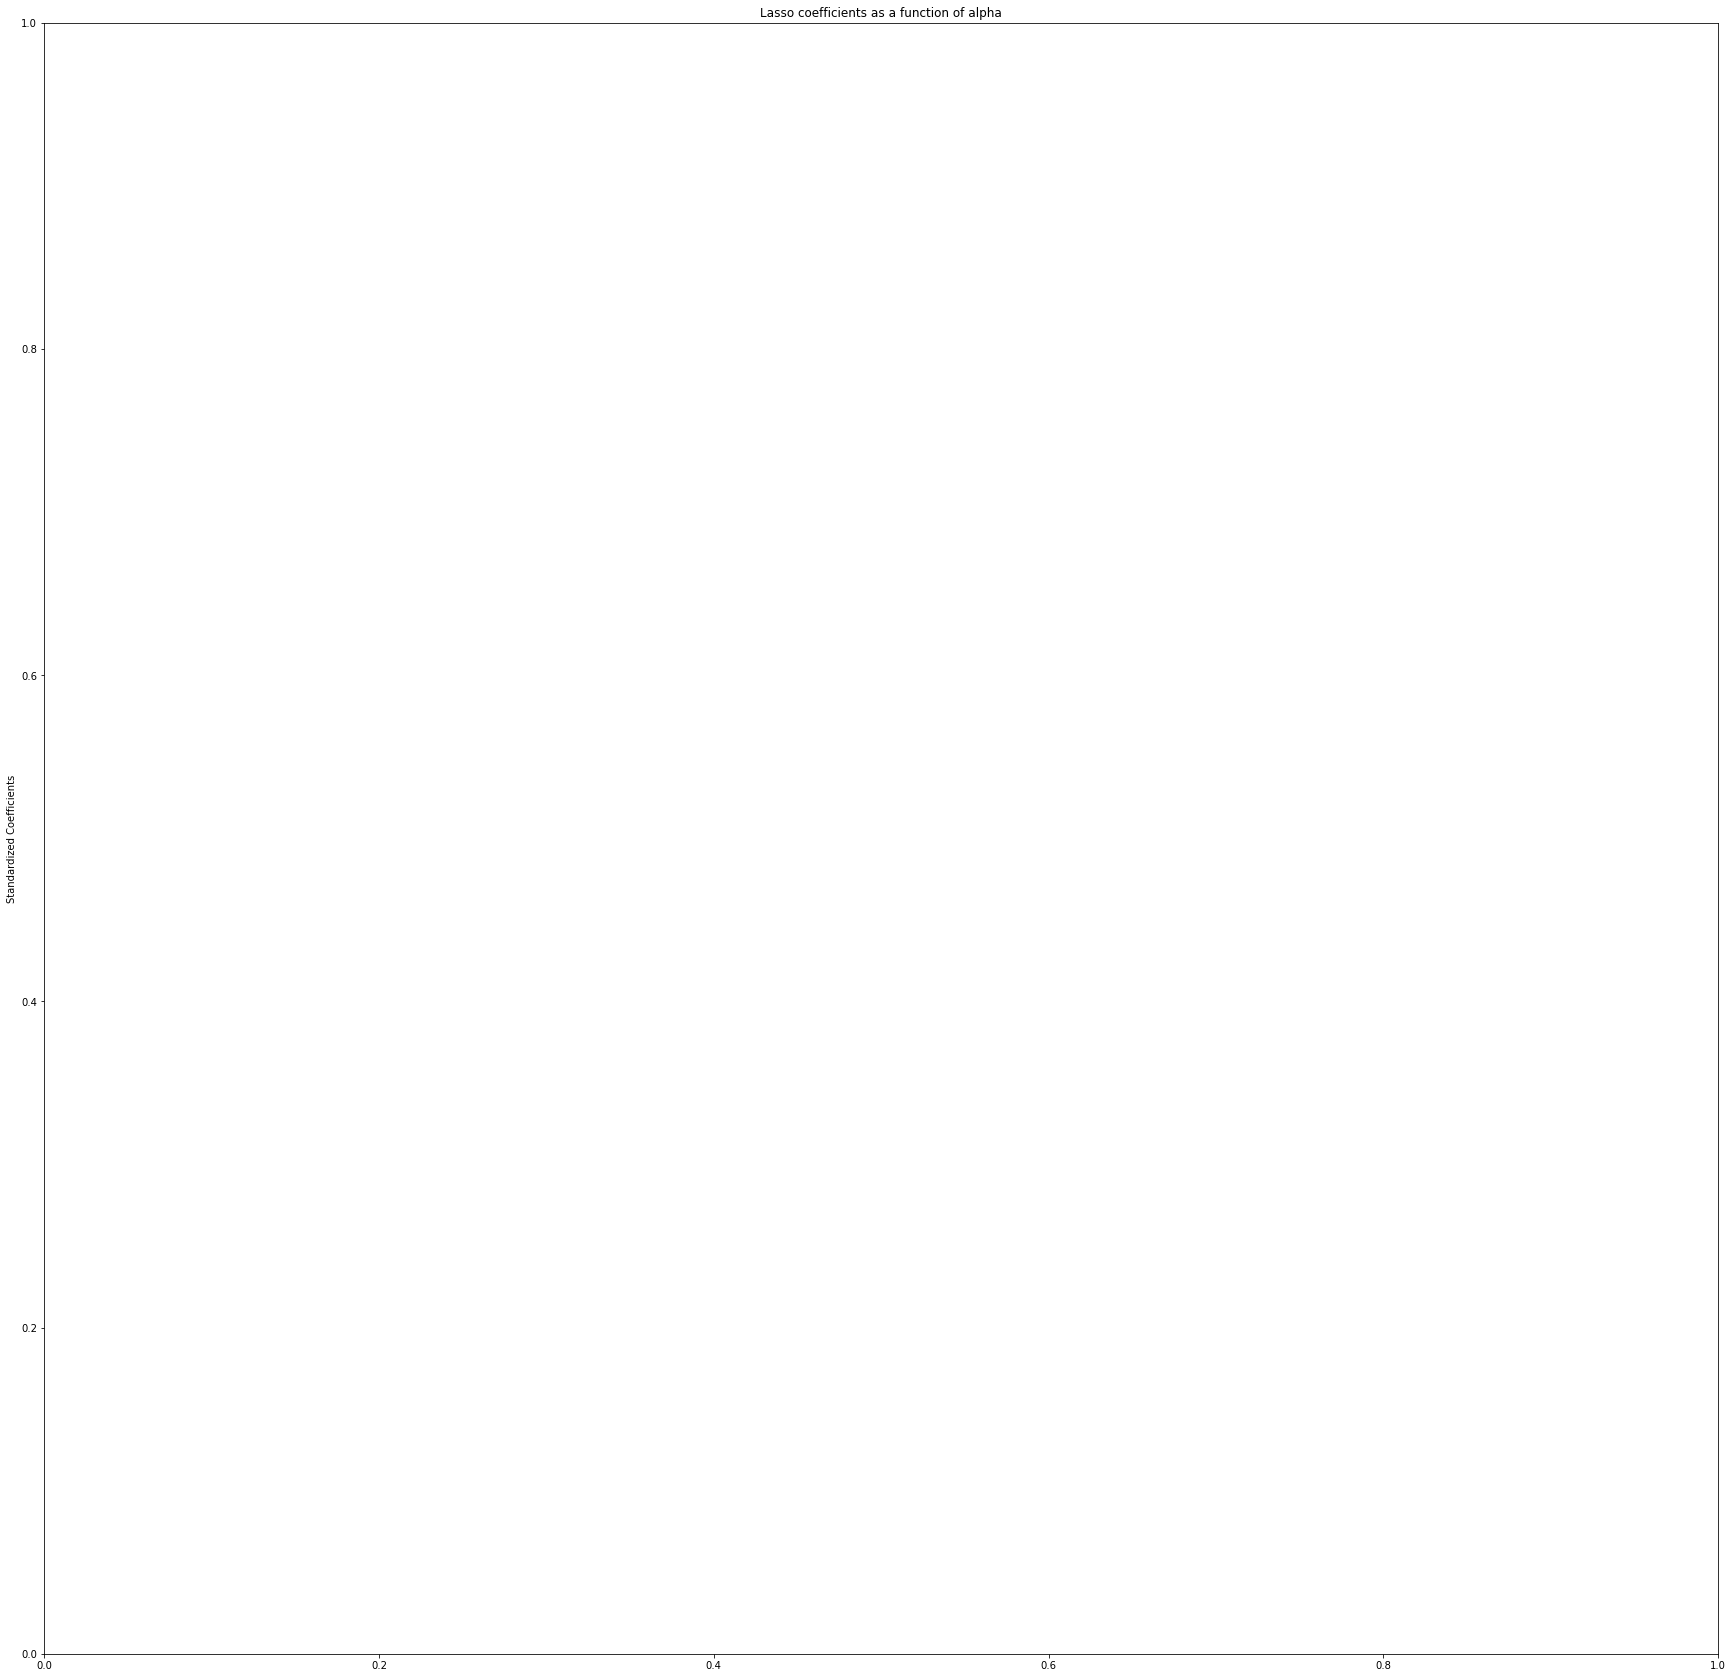

In [126]:
import numpy as np
import matplotlib.pyplot as plt

alphas = np.linspace(0.01,500,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt. figure(figsize=(30, 30))
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

Remember that if alpha = 0, then the lasso gives the least squares fit, and when alpha becomes very large, the lasso gives the null model in which all coefficient estimates equal zero.

Moving from left to right in our plot, we observe that at first the lasso models contains many predictors with high magnitudes of coefficient estimates. With increasing alpha, the coefficient estimates approximate towards zero.

Next, we use cross-validation to find the best value for alpha.

To find the optimal value of alpha, we use scikit learns lasso linear model with iterative fitting along a regularization path (LassoCV). The best model is selected by cross-validation.
1.5.1 k-fold cross validation

In [127]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model.fit(X_train, y_train)

LassoCV(cv=5, max_iter=10000, random_state=0)

In [128]:
model.alpha_

0.041951030938837126

Lasso with optimal alpha

To find the optimal value of alpha, we use scikit learns lasso linear model with iterative fitting along a regularization path (LassoCV). The best model is selected by cross-validation.
1.5.1 k-fold cross validation

In [129]:
from sklearn.linear_model import LassoCV

# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model.fit(X_train, y_train)

LassoCV(cv=5, max_iter=10000, random_state=0)

In [130]:
print(list(zip(lasso_best.coef_, X)))

[(-0.0, array([0, 0, 0, ..., 0, 0, 0], dtype=object)), (-0.0, array([0, 0, 0, ..., 0, 0, 0], dtype=object)), (0.0, array([0, 0, 0, ..., 0, 0, 0], dtype=object)), (0.0, array([0, 0, 0, ..., 0, 0, 0], dtype=object)), (-0.0, array([0, 0, 0, ..., 0, 0, 0], dtype=object)), (0.0, array([0, 0, 0, ..., 0, 0, 0], dtype=object)), (-0.0, array([0, 0, 0, ..., 0, 0, 0], dtype=object)), (-0.0, array([0, 0, 0, ..., 0, 0, 0], dtype=object)), (0.0, array([0, 0, 0, ..., 0, 0, 0], dtype=object)), (-0.0, array([0, 0, 0, ..., 0, 0, 0], dtype=object)), (-0.0, array([0, 0, 0, ..., 0, 0, 0], dtype=object)), (-0.0, array([0, 0, 0, ..., 0, 0, 0], dtype=object)), (0.0, array([0, 0, 0, ..., 0, 0, 0], dtype=object)), (-0.0, array([0, 0, 0, ..., 0, 0, 0], dtype=object)), (-0.0, array([0, 0, 0, ..., 0, 0, 0], dtype=object)), (-0.0, array([0, 0, 0, ..., 0, 0, 0], dtype=object)), (-0.0, array([0, 0, 0, ..., 0, 0, 0], dtype=object)), (-0.0, array([0, 0, 0, ..., 0, 0, 0], dtype=object)), (0.0, array([0, 0, 0, ..., 0, 0,

In [131]:
#Model evaluation

print('R squared training set', round(lasso_best.score(X_train, y_train)*100, 2))
print('R squared test set', round(lasso_best.score(X_test, y_test)*100, 2))

R squared training set 0.0
R squared test set -0.15


In [132]:
mean_squared_error(y_test, lasso_best.predict(X_test))

0.020806138997666226

Lasso path: plot results of cross-validation with mean squared erros (for more information about the plot visit the scikit-learn documentation)

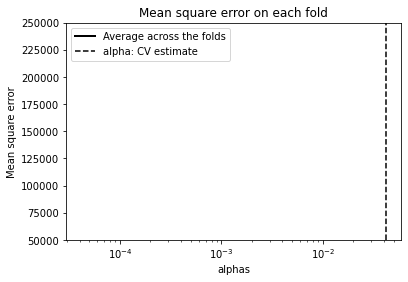

In [133]:
plt.semilogx(model.alphas_, model.mse_path_, ":")
plt.plot(
    model.alphas_ ,
    model.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

ymin, ymax = 50000, 250000
plt.ylim(ymin, ymax);

# Feature Importance Plot

# 1. For RF

Create the Train / Test Split

Here is the python code for creating training and test split of Sklearn Wine dataset. The code demonstrates how to work with Pandas dataframe and Numpy array (ndarray) alternatively by converting Numpy arrays to Pandas Dataframe.

In [134]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [135]:
exp_df

,genes,Astrocyte,Astrocyte.1,Astrocyte.2,Astrocyte.3,Astrocyte.4,Astrocyte.5,Astrocyte.6,Astrocyte.7,Astrocyte.8,...,Astrocyte.1643,Astrocyte.1644,Astrocyte.1645,Astrocyte.1646,Astrocyte.1647,Astrocyte.1648,Astrocyte.1649,Astrocyte.1650,Astrocyte.1651,Astrocyte.1652
0,1-Dec,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1-Mar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1-Sep,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10-Mar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10-Sep,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58815,snoZ278,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58816,snoZ40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58817,snoZ6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58818,snosnR66,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
X = exp_df.transpose()

In [138]:
X

,0,1,2,3,4,5,6,7,8,9,...,58810,58811,58812,58813,58814,58815,58816,58817,58818,58819
genes,1-Dec,1-Mar,1-Sep,10-Mar,10-Sep,11-Mar,11-Sep,12-Sep,14-Sep,15-Sep,...,snoU18,snoU2-30,snoU2_19,snoU83B,snoZ196,snoZ278,snoZ40,snoZ6,snosnR66,yR211F11.2
Astrocyte,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Astrocyte.1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Astrocyte.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Astrocyte.3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Astrocyte.1648,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Astrocyte.1649,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Astrocyte.1650,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Astrocyte.1651,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [237]:
X1 = df1.loc[:, ('BTN3A1', 'CARD8', 'SIRT3', 'SLC30A7')]

In [238]:
X1

,BTN3A1,CARD8,SIRT3,SLC30A7
,0,0,0,0
,0,1,0,0
,0,1,0,0
,0,0,0,1
,0,0,0,0
...,...,...,...,...
,0,0,0,0
,0,0,0,0
,0,0,0,0
,0,0,0,0


In [142]:
X1 = df1.loc[:, ('BTN3A1', 'CARD8', 'SIRT3', 'SLC30A7')]
#X = X1.drop(["labels"], axis=1).values
targets = labels.values

In [143]:
X1

,BTN3A1,CARD8,SIRT3,SLC30A7
,0,0,0,0
,0,1,0,0
,0,1,0,0
,0,0,0,1
,0,0,0,0
...,...,...,...,...
,0,0,0,0
,0,0,0,0
,0,0,0,0
,0,0,0,0


In [144]:
targets

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [145]:
X1_scaled = StandardScaler().fit_transform(X1)

In [146]:
# train test split of the data set

X_train, X_test, y_train, y_test = train_test_split(X1_scaled, targets, random_state=42)

In [147]:
X_train.shape[1]

4

In [148]:
#
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [149]:
# Training / Test Dataframe

#cols = ['IL32', 'S100A4', 'TAC1', 'TLR1']
X_train_std = pd.DataFrame(X_train_std)
X_test_std = pd.DataFrame(X_test_std)

Train the model using Sklearn RandomForestClassifier

Here is the python code for training RandomForestClassifier model using training and test data set created in the previous section

In [150]:
from sklearn.ensemble import RandomForestClassifier
 
forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)
#
# Train the mode
#
forest.fit(X_train_std, y_train)

C:\Users\Negin Rayaneh\AppData\Local\Temp\ipykernel_26816\336997446.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train_std, y_train)


RandomForestClassifier(n_estimators=500, random_state=1)

In [151]:
import numpy as np
 
importances = forest.feature_importances_

In [152]:
importances.shape

(4,)

In [160]:
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)
 
feat_labels = X1.columns[:]
 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) BTN3A1                         0.075545
 2) CARD8                          0.206833
 3) SIRT3                          0.358552
 4) SLC30A7                        0.359069


In [154]:
feat_labels = feat_labels[:-1]

In [161]:
feat_labels

Index(['BTN3A1', 'CARD8', 'SIRT3', 'SLC30A7'], dtype='object', name='')

In [162]:
importances

array([0.07554527, 0.20683289, 0.35855234, 0.3590695 ])

In [163]:
data={'feature_names':feat_labels,'feature_importance':importances}
data

{'feature_names': Index(['BTN3A1', 'CARD8', 'SIRT3', 'SLC30A7'], dtype='object', name=''),
 'feature_importance': array([0.07554527, 0.20683289, 0.35855234, 0.3590695 ])}

In [164]:
 fi_df = pd.DataFrame(data)

In [165]:
#Sort the DataFrame in order decreasing feature importance
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

NameError: name 'model_type' is not defined

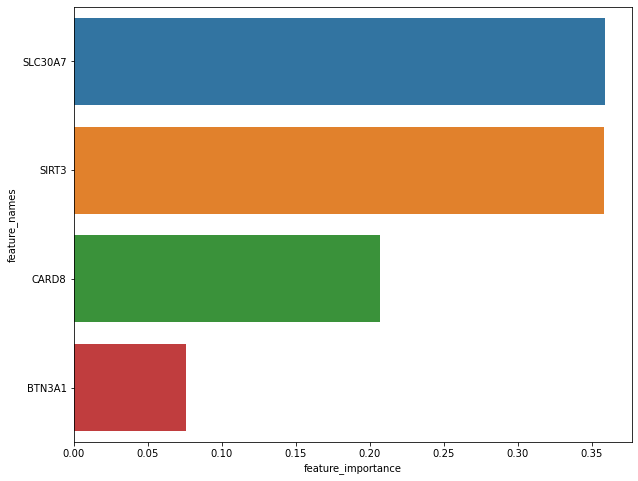

In [166]:
#Define size of bar plot
plt.figure(figsize=(10,8))
#Plot Searborn bar chart
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
plt.title(model_type + 'FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

# 2. For Logistic Regression

In [167]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [168]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)


coefficients = model.coef_[0]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [169]:
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(coefficients)
 
feat_labels = X1.columns[:]
 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) BTN3A1                         0.075545
 2) SLC30A7                        0.359069
 3) SIRT3                          0.358552
 4) CARD8                          0.206833


In [158]:
#feat_labels = feat_labels[:-1]

In [170]:
data={'feature_names':feat_labels,'feature_importance':coefficients}
data

{'feature_names': Index(['BTN3A1', 'CARD8', 'SIRT3', 'SLC30A7'], dtype='object', name=''),
 'feature_importance': array([-0.34664794,  0.11509114, -0.01351005, -0.07048068])}

In [171]:
fi_df = pd.DataFrame(data)

fi_df

,feature_names,feature_importance
0,BTN3A1,-0.346648
1,CARD8,0.115091
2,SIRT3,-0.013510
3,SLC30A7,-0.070481


In [172]:
#Sort the DataFrame in order decreasing feature importance
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

NameError: name 'model_type' is not defined

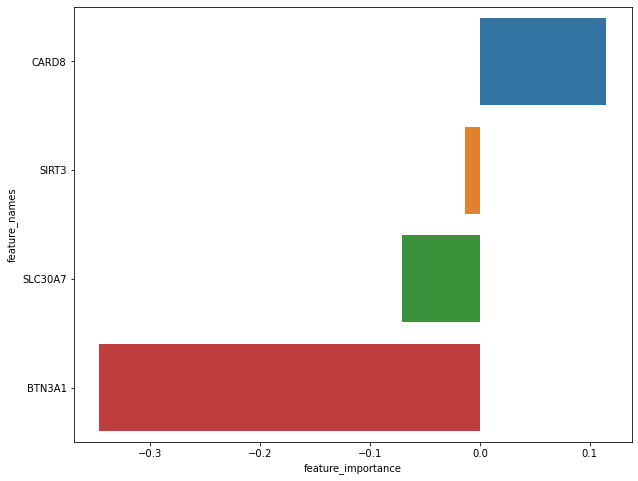

In [173]:
#Define size of bar plot
plt.figure(figsize=(10,8))
#Plot Searborn bar chart
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
plt.title(model_type + 'FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

# Linear Regression

In [174]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [175]:
reg = LinearRegression().fit(X_train, y_train)

In [176]:
reg.score(X_train, y_train)

0.0012328105207694007

In [177]:
reg.coef_

array([[-0.00372534,  0.00410975, -0.00029903, -0.00164169]])

In [178]:
reg.predict(X_train)

array([[ 0.02694471],
       [ 0.02694471],
       [ 0.02169618],
       ...,
       [-0.0016303 ],
       [ 0.02169618],
       [ 0.02694471]])

# 3. For XGBoost

In [179]:
from sklearn.datasets import make_hastie_10_2 
from sklearn.ensemble import GradientBoostingClassifier

# Plot
import matplotlib.pyplot as plt

In [180]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=5, random_state=0)
clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=0.05, max_depth=5, random_state=0)

In [181]:
# prediction for validation data
val_prediction = clf.predict(X_test)

In [182]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, val_prediction, weights = "quadratic")

0.0

In [183]:
feature_importance = clf.feature_importances_

In [184]:
feature_importance

array([0.07857706, 0.09732132, 0.47701915, 0.34708247])

In [185]:
data={'feature_names':feat_labels,'feature_importance':coefficients}
data

{'feature_names': Index(['BTN3A1', 'CARD8', 'SIRT3', 'SLC30A7'], dtype='object', name=''),
 'feature_importance': array([-0.34664794,  0.11509114, -0.01351005, -0.07048068])}

In [186]:
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(feature_importance)
 
feat_labels = X1.columns[:]
 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) BTN3A1                         0.075545
 2) CARD8                          0.206833
 3) SLC30A7                        0.359069
 4) SIRT3                          0.358552


In [174]:
#feat_labels = feat_labels[:-1]

In [187]:
fi_df = pd.DataFrame(data)

fi_df

,feature_names,feature_importance
0,BTN3A1,-0.346648
1,CARD8,0.115091
2,SIRT3,-0.013510
3,SLC30A7,-0.070481


In [188]:
#Sort the DataFrame in order decreasing feature importance
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

In [189]:
# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# feature importance
print(model.feature_importances_)

NameError: name 'XGBClassifier' is not defined

NameError: name 'model_type' is not defined

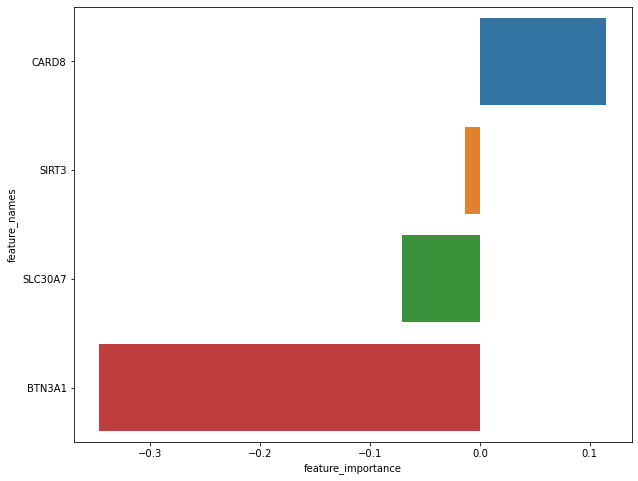

In [190]:
#Define size of bar plot
plt.figure(figsize=(10,8))
#Plot Searborn bar chart
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
plt.title(model_type + 'FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

# 4. For SVM

In [191]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [192]:
!pip install mlxtend
import joblib
import sys


Defaulting to user installation because normal site-packages is not writeable


In [193]:
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [194]:
forward_fs_best=sfs(estimator = svc, k_features = 'best', forward = True,verbose = 1, scoring = 'r2')
sfs_forward_best=forward_fs_best.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was pas

In [195]:
print('R-Squared value:', sfs_forward_best.k_score_)

R-Squared value: -0.027465064646728356


# 4. Stats Model

In [196]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [197]:
from sklearn.inspection import permutation_importance

# Train the neural network on the training set
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

# Building Models and Draw AUC

In [198]:
# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier



from sklearn.metrics import roc_curve, roc_auc_score

In [201]:
# load gene expression as a csv file
#exp_df = pd.read_csv("E:/2023-08-10-AD-Pyroptosis-AI/microarray-data/Feature.csv")

In [202]:
# create a new dataframe by excluding the target column

#X = exp_df.drop(["target"], axis=1).values
#targets = exp_df["target"].values

In [199]:
# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(random_state=1234), 
               GaussianNB(), 
               KNeighborsClassifier(), 
               DecisionTreeClassifier(random_state=1234),
               RandomForestClassifier(random_state=1234)]

In [200]:
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

In [201]:
# train test split of the data set
# fitting the transformer and then return the transformed training instances
targets = LabelEncoder().fit_transform(targets)

X_scaled = StandardScaler().fit_transform(X1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [202]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, targets, random_state=42)

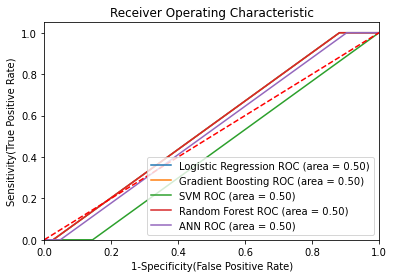

In [203]:
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(),
},
{
    'label': 'Gradient Boosting',
    'model': GradientBoostingClassifier(),
},
{
    'label': 'SVM',
    'model': SVC(probability=True),
},
{
    'label': 'Random Forest',
    'model': RandomForestClassifier(),
},
{
    'label': 'ANN',
    'model': MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500),
},
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

,fpr,tpr,auc
classifiers,,,
NaN,"[0.0, 0.021739130434782608, 0.0217391304347826...","[0.0, 0.0, 0.037037037037037035, 0.03703703703...",0.867955
NaN,"[0.0, 0.0, 0.0, 0.043478260869565216, 0.043478...","[0.0, 0.037037037037037035, 0.0740740740740740...",0.844605
NaN,"[0.0, 0.0, 0.021739130434782608, 0.13043478260...","[0.0, 0.07407407407407407, 0.25925925925925924...",0.851852
NaN,"[0.0, 0.17391304347826086, 1.0]","[0.0, 0.6296296296296297, 1.0]",0.727858
NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.043478260869565216...","[0.0, 0.037037037037037035, 0.0740740740740740...",0.876409
LogisticRegression,"[0.0, 0.0, 0.0, 0.021739130434782608, 0.021739...","[0.0, 0.037037037037037035, 0.1481481481481481...",0.903382
GaussianNB,"[0.0, 0.10869565217391304, 0.10869565217391304...","[0.0, 0.2962962962962963, 0.3333333333333333, ...",0.745572
KNeighborsClassifier,"[0.0, 0.0, 0.021739130434782608, 0.15217391304...","[0.0, 0.1111111111111111, 0.25925925925925924,...",0.769726
DecisionTreeClassifier,"[0.0, 0.15217391304347827, 1.0]","[0.0, 0.7037037037037037, 1.0]",0.775765


# Risk Score Calculation using Linear Regression

In [204]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [205]:
#X1 = exp_df.loc[:, ]

In [206]:
#X1 = exp_df.transpose()

In [209]:
#labels

In [210]:
#X = X1.drop(["target"], axis=1).values
#targets = X1["target"].values

In [239]:
X_scaled = StandardScaler().fit_transform(X1)

In [240]:
import statsmodels.api as sm
# defining dependent and independent variables

In [241]:
# train test split of the data set

X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels, random_state=42)

In [242]:
# build the model and fit the data
model = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.693093
         Iterations 3


In [243]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                 labels   No. Observations:                 1272
Model:                          Logit   Df Residuals:                     1268
Method:                           MLE   Df Model:                            3
Date:                Tue, 26 Dec 2023   Pseudo R-squ.:                  -4.627
Time:                        10:37:33   Log-Likelihood:                -881.61
converged:                       True   LL-Null:                       -156.69
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0166      0.056     -0.296      0.767      -0.126       0.093
x2             0.0061      0.055      0.110      0.912      -0.102       0.114
x3            -0.0084      0.055     -0.153      0.8

The coefficients of the model are displayed in the table as log-odds, which can be confusing for some people. As a result, I’ve transformed the coefficients to odds ratios to make the results more intuitive. I’ve also used the p-values to determine whether the variables are statistically significant at a 95% confidence interval. Among the eight variables, only the number of times pregnant, plasma glucose concentration, and diastolic blood pressure are found to be statistically significant.

In [244]:
import numpy as np
params = model.params
conf = model.conf_int()

In [245]:
conf

,0,1
x1,-0.126464,0.093269
x2,-0.101756,0.113887
x3,-0.115808,0.099016
x4,-0.102871,0.114222


In [246]:
params

x1   -0.016598
x2    0.006065
x3   -0.008396
x4    0.005676
dtype: float64

In [247]:
conf['Odds Ratio'] = params

In [248]:
conf.columns = ['2.5%', '97.5%', 'Odds Ratio']# convert log odds to ORs
odds = pd.DataFrame(np.exp(conf))# check if pvalues are significant
odds['pvalues'] = model.pvalues
odds['significant?'] = ['significant' if pval <= 0.05 else 'not significant' for pval in model.pvalues]
odds

,2.5%,97.5%,Odds Ratio,pvalues,significant?
x1,0.881206,1.097757,0.983539,0.767158,not significant
x2,0.903250,1.120625,1.006084,0.912206,not significant
x3,0.890647,1.104084,0.991639,0.878240,not significant
x4,0.902243,1.121001,1.005692,0.918376,not significant


In [23]:
{'feature_names': Index(['BTN3A1', 'CARD8', 'SIRT3', 'SLC30A7'], dtype='object', name='gene'),
 'feature_importance': array([0.767158, 0.912206, 0.878240 , 0.918376])}

NameError: name 'Index' is not defined

In [250]:
import pandas as pd                              

    # assign data of lists.  
data = {'Gene': ['BTN3A1', 'CARD8', 'SIRT3', 'SLC30A7'], 'OR': ['0.983539', '1.006084', '0.991639', '1.005692'], 'll': ['0.881206', '0.093', '0.1302', '0.3624'], 'hl': ['0.174382', '0.214036', '0.323616', '2.739058']} 

In [251]:
forest_df = pd.DataFrame(data)
print(forest_df) 

      Gene           OR      ll        hl
0   BTN3A1  -0.75380504  0.1003  0.174382
1    CARD8  -0.74315333   0.093  0.214036
2    SIRT3   -0.7525729  0.1302  0.323616
3  SLC30A7  -0.74853965  0.3624  2.739058


In [252]:
pip install forestplot

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [253]:
import forestplot as fp

<AxesSubplot:xlabel='Pearson correlation', ylabel='Confidence interval'>

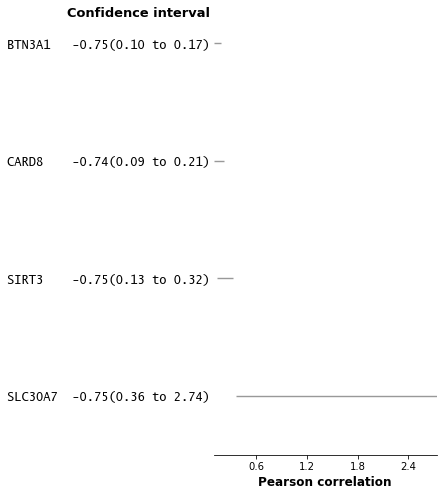

In [254]:
fp.forestplot(forest_df,  # the dataframe with results data
              estimate="OR",  # col containing estimated effect size 
              ll="ll", hl="hl",  # columns containing conf. int. lower and higher limits
              varlabel="Gene",  # column containing variable label
              ylabel="Confidence interval",  # y-label title
              xlabel="Pearson correlation",  # x-label title
              )

# Nomogram using simpleNomo

In [276]:
!pip install simpleNomo

Defaulting to user installation because normal site-packages is not writeable


  Created wheel for simpleNomo: filename=simpleNomo-1.0.0-py3-none-any.whl size=6034 sha256=2aaa5c578b5a97be13223ff9e43ac52b3167f1327c86bb7cb940b728ced4e339
  Stored in directory: c:\users\negin rayaneh\appdata\local\pip\cache\wheels\94\28\28\2266e52e285e38bbc7d3159f6d6207925bcf17cd81279e6e9e
Successfully built simpleNomo


In [279]:
import simpleNomo
path = "E:/2023-09-27-Moslehi-scrnaseq/data/GSE148842_RAW/GSM4483741_PW029-701.cts/nomogram.xlsx"

findfont: Font family ['Songti Sc'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Songti Sc'] not found. Falling back to DejaVu Sans.


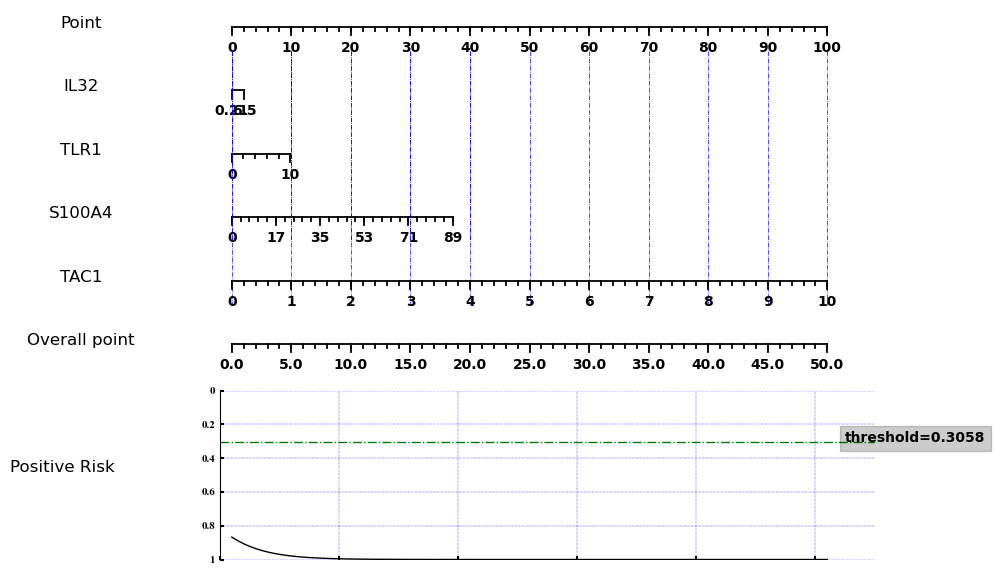

In [280]:
nomo = simpleNomo.nomogram(path=path)

# Decision Plot

In [1]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable

In [176]:
from pprint import pprint
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import pickle
import shap
from sklearn.model_selection import train_test_split, StratifiedKFold
import warnings

In [177]:
# load gene expression as a csv file
import pandas as pd
exp_df = pd.read_csv("E:/2023-08-10-AD-Pyroptosis-AI/microarray-data/Feature.csv")

In [178]:
exp_df = pd.read_csv("E:/2023-08-10-AD-Pyroptosis-AI/microarray-data/Feature.csv")
X1 = exp_df.loc[:, ('IL32', 'S100A4', 'TAC1', 'TLR1', 'target')]

In [179]:
X = X1.drop(["target"], axis=1).values
targets = X1["target"].values

In [180]:
# create a train/test split
random_state = 7
X_train, X_test, y_train, y_test = train_test_split(X, targets, test_size=0.2, random_state=random_state)
d_train = lgb.Dataset(X_train, label=y_train)
d_test = lgb.Dataset(X_test, label=y_test)

In [181]:
params = {
    "max_bin": 512,
    "learning_rate": 0.05,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "binary_logloss",
    "num_leaves": 10,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True,
    "random_state": random_state
}

model = lgb.train(params, d_train, 10000, valid_sets=[d_test])

In [182]:
explainer = shap.TreeExplainer(model)
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")

select = range(20)
features = X_test
features_display = ['IL32','S100A4', 'TAC1', 'TLR1']
features_display = np.array(features_display)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    shap_values = explainer.shap_values(features)[1]
    shap_interaction_values = explainer.shap_interaction_values(features)
if isinstance(shap_interaction_values, list):
    shap_interaction_values = shap_interaction_values[1]

Explainer expected value: [-0.86809159]


In [183]:
shap_values

array([[-0.03697477, -0.82738767, -1.1971465 ,  0.24446705],
       [-0.03697477, -0.82738767,  1.72663065,  0.24446705],
       [ 0.20054428,  0.82075151, -1.1971465 ,  0.95893649],
       [-0.03697477, -0.82738767,  1.72663065, -0.06444007],
       [-0.03697477,  0.82075151, -1.1971465 , -0.33868678],
       [-0.03697477, -0.82738767, -1.1971465 ,  0.95893649],
       [-0.03697477, -0.82738767, -1.1971465 , -0.33868678],
       [-0.03697477, -0.82738767, -1.1971465 ,  0.24446705],
       [ 0.20054428,  0.82075151,  1.72663065, -0.33868678],
       [ 0.20054428,  1.26573048, -1.1971465 , -0.33868678],
       [-0.03697477, -0.82738767, -1.1971465 ,  0.24446705],
       [ 0.20054428,  1.60471759,  1.72663065,  0.24446705],
       [ 0.20054428,  0.82075151,  1.72663065, -0.33868678],
       [-0.03697477, -0.82738767, -1.1971465 , -0.33868678],
       [-0.03697477, -0.82738767, -1.1971465 , -0.06444007],
       [-0.10735036, -0.2734808 , -1.1971465 ,  0.95893649],
       [-0.03697477, -0.

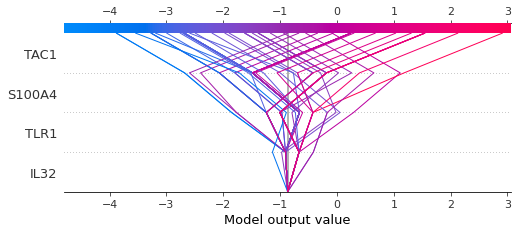

Original size: [6. 4.]
New size: [10. 15.]


<Figure size 720x1080 with 0 Axes>

In [192]:
import matplotlib.pyplot as plt

shap.decision_plot(expected_value, shap_values, features_display)
# customize size
print(f'Original size: {plt.gcf().get_size_inches()}')
w, _ = plt.gcf().get_size_inches()
plt.gcf().set_size_inches(10, 15)
plt.tight_layout()
print(f'New size: {plt.gcf().get_size_inches()}')

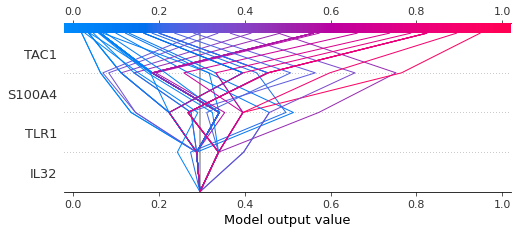

In [23]:
shap.decision_plot(expected_value, shap_values, features_display, link='logit')

elementwise comparison failed; this will raise an error in the future.


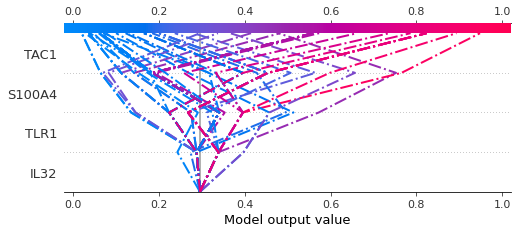

In [24]:
# Our naive cutoff point is zero log odds (probability 0.5).
y_pred = (shap_values.sum(1) + expected_value) > 0
misclassified = y_pred != y_test[select]
shap.decision_plot(expected_value, shap_values, features_display, link='logit', highlight=misclassified)

In [27]:
import numpy as np

In [28]:
my_array = np. array(features_display)

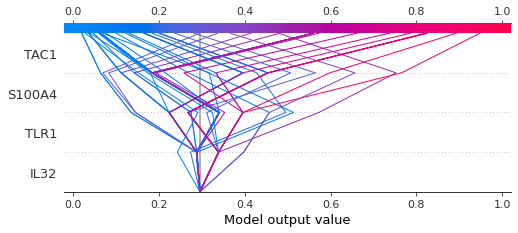

In [33]:
shap.decision_plot(expected_value, shap_values, features_display,
                   link='logit', highlight=0)

In [42]:
from IPython.display import HTML

In [46]:
%matplotlib inline
force_plot = shap.force_plot(expected_value, shap_values, features_display,
                link='logit')
HTML(f"<div style='background-color:Lavender;'>{shap.getjs() + force_plot.html()}</div>")

In [48]:
shap_values

array([[-0.03697477, -0.82738767, -1.1971465 ,  0.24446705],
       [-0.03697477, -0.82738767,  1.72663065,  0.24446705],
       [ 0.20054428,  0.82075151, -1.1971465 ,  0.95893649],
       [-0.03697477, -0.82738767,  1.72663065, -0.06444007],
       [-0.03697477,  0.82075151, -1.1971465 , -0.33868678],
       [-0.03697477, -0.82738767, -1.1971465 ,  0.95893649],
       [-0.03697477, -0.82738767, -1.1971465 , -0.33868678],
       [-0.03697477, -0.82738767, -1.1971465 ,  0.24446705],
       [ 0.20054428,  0.82075151,  1.72663065, -0.33868678],
       [ 0.20054428,  1.26573048, -1.1971465 , -0.33868678],
       [-0.03697477, -0.82738767, -1.1971465 ,  0.24446705],
       [ 0.20054428,  1.60471759,  1.72663065,  0.24446705],
       [ 0.20054428,  0.82075151,  1.72663065, -0.33868678],
       [-0.03697477, -0.82738767, -1.1971465 , -0.33868678],
       [-0.03697477, -0.82738767, -1.1971465 , -0.06444007],
       [-0.10735036, -0.2734808 , -1.1971465 ,  0.95893649],
       [-0.03697477, -0.

In [66]:
shap_values1 = pd.DataFrame(shap_values, columns =['IL32', 'S100A4', 'TLR1', 'TAC1'])

In [67]:
shap_values1

,IL32,S100A4,TLR1,TAC1
0,-0.036975,-0.827388,-1.197146,0.244467
1,-0.036975,-0.827388,1.726631,0.244467
2,0.200544,0.820752,-1.197146,0.958936
3,-0.036975,-0.827388,1.726631,-0.064440
4,-0.036975,0.820752,-1.197146,-0.338687
5,-0.036975,-0.827388,-1.197146,0.958936
6,-0.036975,-0.827388,-1.197146,-0.338687
7,-0.036975,-0.827388,-1.197146,0.244467
8,0.200544,0.820752,1.726631,-0.338687
9,0.200544,1.265730,-1.197146,-0.338687


In [ ]:
shap_values1[]

In [90]:
import pandas as pd
import shap
import sklearn


exp_df = pd.read_csv("E:/2023-08-10-AD-Pyroptosis-AI/microarray-data/Feature.csv")
X1 = exp_df.loc[:, ('IL32', 'S100A4', 'TAC1', 'TLR1', 'target')]
X = X1.drop(["target"], axis=1).values
targets = X1["target"].values

X100 = shap.utils.sample(X, 100) # 100 instances for use as the background distribution

# a simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, targets)

LinearRegression()

In [97]:
X = pd.DataFrame(X, columns =['IL32', 'S100A4', 'TLR1', 'TAC1'])

In [101]:
X100

array([[9.57473800e-01, 4.37189700e+00, 8.15370800e-01, 4.55527640e+00],
       [1.03633530e+00, 5.40004600e-01, 8.33936150e-01, 1.11286820e+00],
       [7.96285750e-01, 7.95482460e-01, 2.11303880e+00, 1.09026710e+00],
       [6.72814370e-01, 2.40052080e+00, 6.19178900e+00, 8.30416700e+00],
       [9.96347900e-01, 9.17430340e-01, 6.56526760e+00, 8.66494400e-01],
       [1.02067290e+00, 1.52220080e+00, 7.45040300e-01, 8.59446800e-01],
       [1.95864650e+00, 3.54079440e+00, 3.93647770e+00, 8.55106230e-01],
       [5.71359340e-01, 1.46788750e+00, 3.61666040e+00, 1.19298610e+00],
       [5.35900000e+00, 3.91000000e+00, 2.95200000e+00, 5.11000000e+00],
       [4.59784000e+00, 5.65150000e+00, 8.64091700e+00, 4.72087000e+00],
       [1.15289590e+00, 9.01732270e-01, 6.84412570e+00, 1.52989880e+00],
       [2.04726900e+00, 1.05556340e+00, 1.05391085e-01, 1.16265510e+00],
       [4.90700000e+00, 4.69800000e+00, 2.87600000e+00, 4.86200000e+00],
       [2.36572070e+00, 3.03025200e+00, 4.75294200e

In [114]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X100)

In [115]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))

Model coefficients:

IL32 = 0.04857
S100A4 = 0.03208
TLR1 = 0.0238
TAC1 = 0.02071


In [123]:
# Importing required modules
 
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

In [126]:
exp_df = pd.read_csv("E:/2023-08-10-AD-Pyroptosis-AI/microarray-data/Feature.csv")
X1 = exp_df.loc[:, ('IL32', 'S100A4', 'TAC1', 'TLR1', 'target')]
X = X1.drop(["target"], axis=1).values
targets = X1["target"].values

In [127]:
    # Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, targets,
                     test_size = 0.1, random_state = 13)

In [128]:
# Creating and fitting model
model = SVC()
model.fit(X_train, y_train)

SVC()

In [129]:
# Predict Probabilities
prob = model.decision_function(X_test)

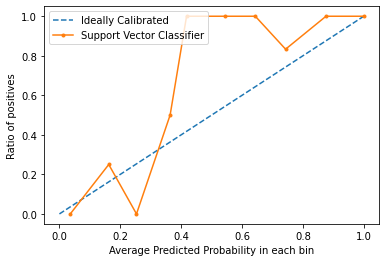

In [130]:

 

 

 
# Creating Calibration Curve
x, y = calibration_curve(y_test, prob, n_bins = 10, normalize = True)
 
# Plot calibration curve
 
# Plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Ideally Calibrated')
 
# Plot model's calibration curve
plt.plot(y, x, marker = '.', label = 'Support Vector Classifier')
 
leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()

In [131]:
exp_df = pd.read_csv("E:/2023-08-10-AD-Pyroptosis-AI/microarray-data/Feature.csv")
X1 = exp_df.loc[:, ('IL32', 'S100A4', 'TAC1', 'TLR1', 'target')]
X = X1.drop(["target"], axis=1).values
targets = X1["target"].values

X100 = shap.utils.sample(X, 100) # 100 instances for use as the background distribution

# a simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, targets)

LinearRegression()

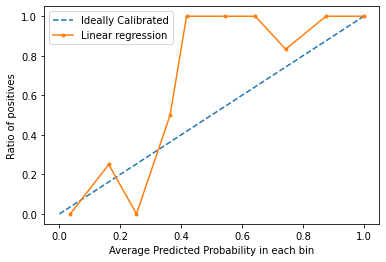

In [132]:
# Plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Ideally Calibrated')
 
# Plot model's calibration curve
plt.plot(y, x, marker = '.', label = 'Linear regression')
 
leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()

In [134]:
from sklearn.ensemble import RandomForestClassifier
 
forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)
#
# Train the mode
#
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

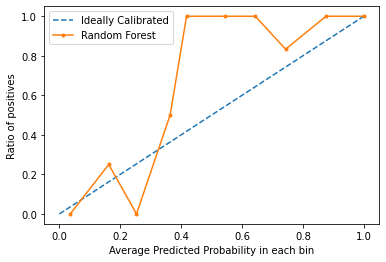

In [135]:
# Plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Ideally Calibrated')
 
# Plot model's calibration curve
plt.plot(y, x, marker = '.', label = 'Random Forest')
 
leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()

In [136]:
from sklearn.datasets import make_hastie_10_2 
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=5, random_state=0)
clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=5, random_state=0)

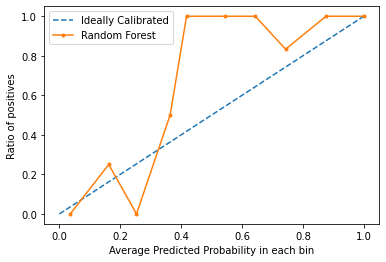

In [137]:
# Plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Ideally Calibrated')
 
# Plot model's calibration curve
plt.plot(y, x, marker = '.', label = 'Random Forest')
 
leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()

In [138]:
from sklearn.neural_network import MLPClassifier

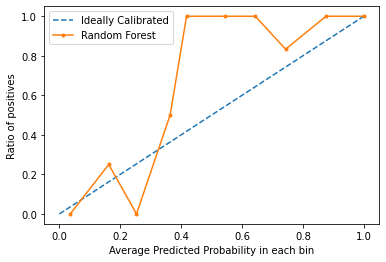

In [140]:
MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
# Plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Ideally Calibrated')
 
# Plot model's calibration curve
plt.plot(y, x, marker = '.', label = 'Random Forest')
 
leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()

# Cumulative Distribution Curve

In [141]:
# defining the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
  
# No of Data points
N = 500
  
# initializing random values
data = np.random.randn(N)

In [142]:
data

array([-7.79576321e-02, -1.42620565e+00,  1.62896922e+00, -4.91335564e-01,
       -1.38854731e+00,  5.95116398e-02, -7.48830278e-02,  1.12565704e+00,
        2.07159834e+00,  6.72472125e-01, -2.69751029e-01,  3.13665255e-01,
       -4.40985703e-02,  7.87521601e-01,  1.07190819e+00, -4.50643990e-01,
        7.40147843e-01,  2.53871955e-01,  9.41163882e-01, -5.16995328e-01,
        2.54958848e-01, -7.68750499e-01,  3.98568808e-01,  5.91918264e-01,
        7.65870908e-01,  1.49312071e+00,  1.32893833e+00, -5.93198910e-01,
        1.93302236e-01,  1.96989258e+00, -1.10129504e+00, -1.36412571e+00,
       -2.66119432e-01,  1.61360326e+00, -2.29606909e-01, -4.45789045e-01,
       -6.25388978e-01, -2.61578654e-01, -1.10737471e+00, -7.21603945e-01,
        4.90809847e-01,  1.65694090e-01, -1.86900678e-01, -5.69906306e-01,
       -6.51949579e-01,  1.58583710e+00, -2.99018293e-01, -8.43507988e-01,
        1.52212242e+00, -7.75671141e-02, -1.89248682e-01,  1.45682836e+00,
       -6.72466778e-02,  

In [147]:
 #getting data of the histogram
count, bins_count = np.histogram(X100, bins=10)

In [148]:
count

array([392,   4,   2,   1,   0,   0,   0,   0,   0,   1], dtype=int64)

In [149]:
bins_count

array([2.56672860e-02, 8.98159516e+00, 1.79375230e+01, 2.68934509e+01,
       3.58493788e+01, 4.48053066e+01, 5.37612345e+01, 6.27171624e+01,
       7.16730903e+01, 8.06290181e+01, 8.95849460e+01])

In [150]:
# finding the PDF of the histogram using count values
pdf = count / sum(count)

In [151]:
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  

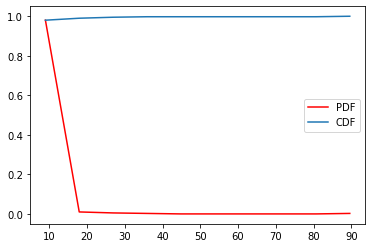

In [152]:
# plotting PDF and CDF
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()

# Decision and clinical influence curve

In [153]:
exp_df = pd.read_csv("E:/2023-08-10-AD-Pyroptosis-AI/microarray-data/Feature.csv")
X1 = exp_df.loc[:, ('IL32', 'S100A4', 'TAC1', 'TLR1', 'target')]
X = X1.drop(["target"], axis=1).values
targets = X1["target"].values

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [157]:
from matplotlib import pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [163]:
# train test split of the data set
# fitting the transformer and then return the transformed training instances
targets = LabelEncoder().fit_transform(targets)

X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, targets, random_state=42)

In [164]:
baseline_model = LogisticRegression(random_state=5)

In [165]:
baseline_model.fit(X_train, y_train)
tree_model = GradientBoostingClassifier(random_state=5)
tree_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=5)

In [169]:
!pip install statkit

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [170]:
from statkit.decision import NetBenefitDisplay

In [171]:
y_pred_base = baseline_model.predict_proba(X_test)[:, 1]
y_pred_tree = tree_model.predict_proba(X_test)[:, 1]

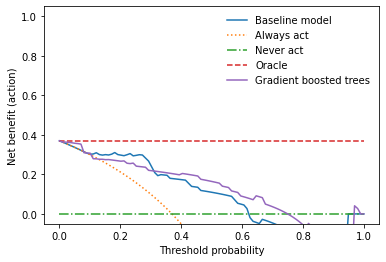

In [174]:
NetBenefitDisplay.from_predictions(y_test, y_pred_base, name='Baseline model')
NetBenefitDisplay.from_predictions(y_test, y_pred_tree, name='Gradient boosted trees', show_references=False, ax=plt.gca())

# Consensus Plot and PCA clustering

In [194]:
!pip install pyckmeans

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [195]:
from pyckmeans import CKmeans

In [344]:
exp_df = pd.read_csv("E:/2023-08-10-AD-Pyroptosis-AI/microarray-data/Feature.csv")
X1 = exp_df.loc[:, ('IL32', 'S100A4', 'TAC1', 'TLR1', 'target')]
X = X1.drop(["target"], axis=1).values
targets = X1["target"].values

In [345]:
# train test split of the data set
# fitting the transformer and then return the transformed training instances
targets = LabelEncoder().fit_transform(targets)

X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, targets, random_state=42)

In [346]:
# apply Consensus K-Means
# 3 clusters, 100 K-Means runs,
# draw 80% of samples and 50% of features for each single K-Means
ckm = CKmeans(k=3, n_rep=100, p_samp=0.8, p_feat=0.5)
ckm.fit(X_train)
ckm_res = ckm.predict(X_train)

Bayesian Information Criterion: 165.46227671571395
Davies-Bouldin Index: 0.7362259982369403
Silhouette Score: 0.5859699790204799
Calinski-Harabasz Index: 113.88276597283225
Cluster Membership: [2 1 2 0 0 2 2 2 0 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 0 2 2 2 2
 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 0 2 0 2 0
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2
 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2
 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 1 2 0 0 2 2 2 2 2]


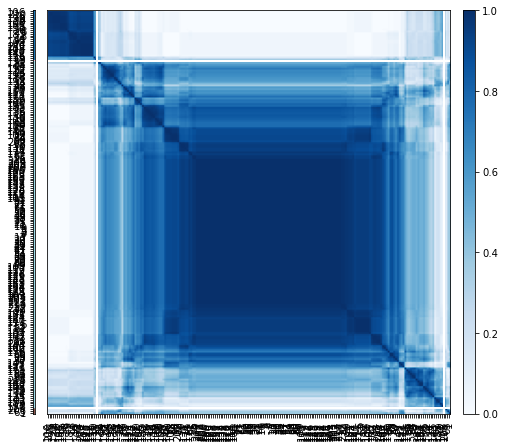

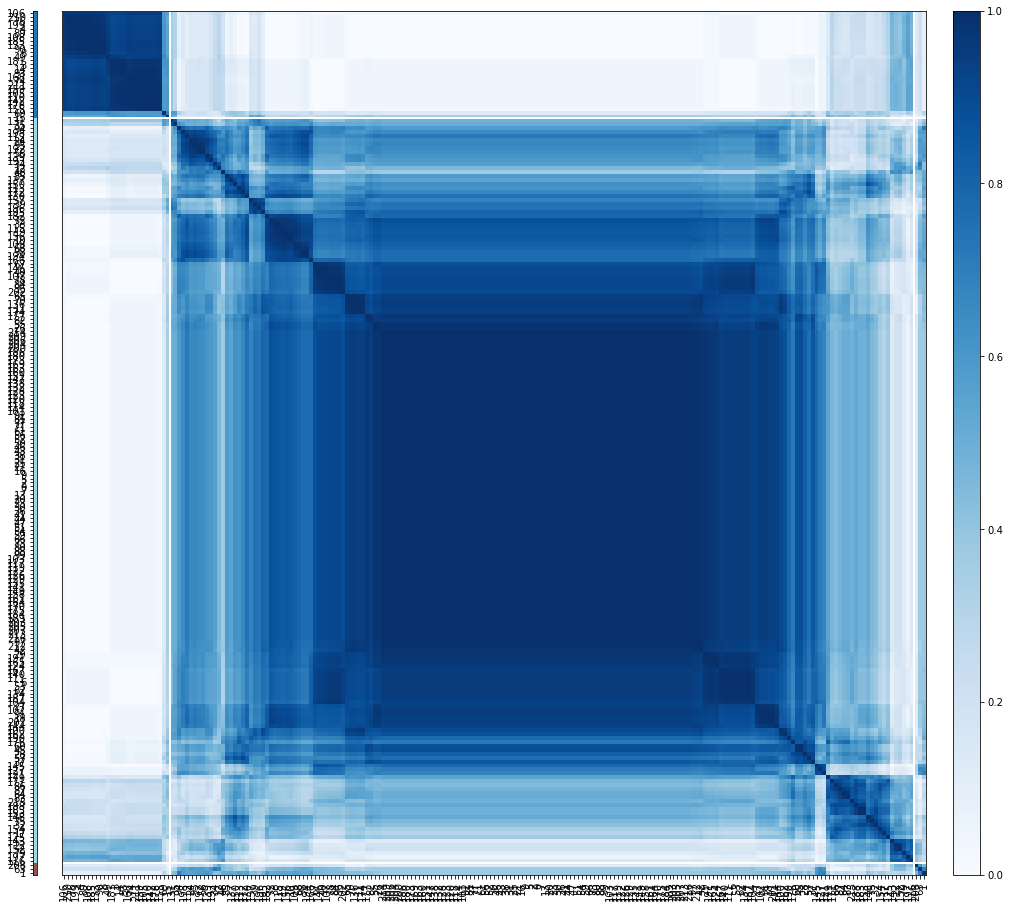

In [347]:
# plot consensus matrix and consensus clustering
fig = ckm_res.plot(figsize=(7,7))

# consensus matrix
ckm_res.cmatrix

# clustering metrics
print('Bayesian Information Criterion:', ckm_res.bic)
print('Davies-Bouldin Index:', ckm_res.db)
print('Silhouette Score:', ckm_res.sil)
print('Calinski-Harabasz Index:', ckm_res.ch)

# consensus clusters
print('Cluster Membership:', ckm_res.cl)
# plot consensus matrix and consensus clustering
fig = ckm_res.plot(figsize=(15,15))

In [348]:
from pyckmeans import MultiCKMeans
mckm = MultiCKMeans(k=[2, 3, 4, 5], n_rep=100, p_samp=0.8, p_feat=0.5)
mckm.fit(X_train)
mckm_res = mckm.predict(X_train)

Metrics:
   k       sil         bic        db          ch
0  2  0.607893  212.632141  0.726844  133.373955
1  3  0.588025  185.789672  1.302011   94.131205
2  4  0.512673  104.328509  0.848816  128.137933
3  5  0.367414  162.568411  1.318570   63.514446


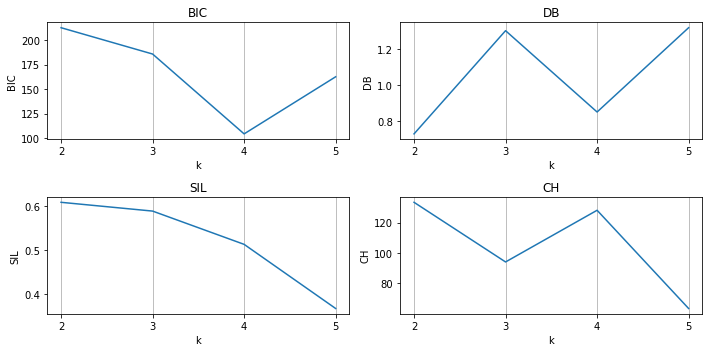

In [349]:
# clustering metrics
print('Metrics:')
print(mckm_res.metrics)

# plot clustering metrics against k
# BIC, DB: lower is better
# SIL, CH: higher is better
mckm_res.plot_metrics(figsize=(10,5))


# get a single CKmeansResult                  0 |1| 2  3
ckm_res_k3 = mckm_res.ckmeans_results[1] # k=[2, 3, 4, 5]
# ...
# see "Clustering a Data Matrix (Single K)"

Continues

In [350]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.


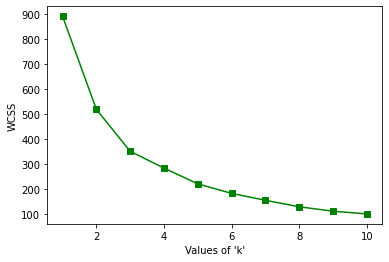

In [351]:
wcss = {}
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss[i] = kmeans.inertia_
     
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.show()

In [352]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(X_train)

KMeans(n_clusters=2)

In [353]:
pca=PCA(n_components=2)
 
reduced_X=pd.DataFrame(data=pca.fit_transform(X),columns=['PCA1','PCA2'])
 
#Reduced Features
reduced_X.head()

,PCA1,PCA2
0,-0.219257,4.453643
1,-0.103098,4.768783
2,2.378407,3.705247
3,0.886921,4.905043
4,0.141036,4.474742


In [354]:
centers=pca.transform(kmeans.cluster_centers_)
 
# reduced centers
centers

array([[-3.72851915, -3.69525911],
       [-2.84635049, -0.34141321]])

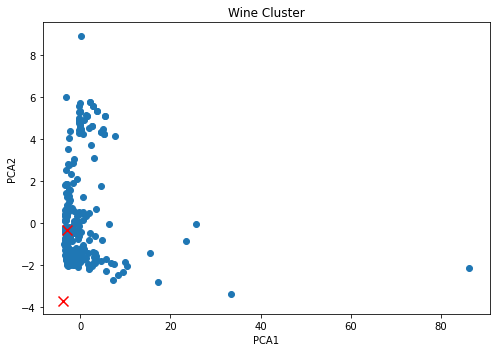

In [355]:
plt.figure(figsize=(7,5))
 
# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'])
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Cluster')
plt.tight_layout()

In [356]:
pca.components_

array([[ 0.00991094,  0.02496496,  0.99773779,  0.06162643],
       [ 0.50596759,  0.65435689, -0.05593756,  0.55918231]])

In [357]:
df = pd.DataFrame(X)

In [358]:
df

,0,1,2,3
0,5.421000,3.919000,2.986000,4.309000
1,5.506000,4.494000,3.098000,4.134000
2,4.360000,3.743000,5.599000,4.398000
3,5.337000,4.228000,4.049000,4.937000
4,4.805000,4.378000,3.336000,4.402000
...,...,...,...,...
285,3.970760,5.064406,8.432418,4.423237
286,4.870843,5.804068,4.685235,3.953713
287,4.890096,6.329166,6.859852,3.968215
288,4.906945,6.779123,5.420139,4.014539


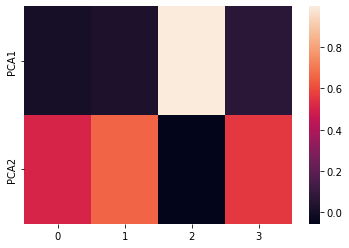

In [359]:
component_df=pd.DataFrame(pca.components_,index=['PCA1',"PCA2"],columns=df.columns)
# Heat map
sns.heatmap(component_df)
plt.show()

In [360]:
Cluster = [0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0,
 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 0, 0, 1, 1, 2, 2, 1, 
          1, 2, 1, 0, 0, 2, 2, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 0, 0, 0, 2, 2, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2,
          1, 1, 1, 0, 0, 0, 2, 2, 2, 1, 1, 1, 0, 0, 0, 1, 2]

In [361]:
len(Cluster)

290

In [362]:
column = pd.DataFrame(Cluster)

In [363]:
df["cluster"] = column

In [364]:
df

,0,1,2,3,cluster
0,5.421000,3.919000,2.986000,4.309000,0
1,5.506000,4.494000,3.098000,4.134000,0
2,4.360000,3.743000,5.599000,4.398000,0
3,5.337000,4.228000,4.049000,4.937000,1
4,4.805000,4.378000,3.336000,4.402000,1
...,...,...,...,...,...
285,3.970760,5.064406,8.432418,4.423237,0
286,4.870843,5.804068,4.685235,3.953713,0
287,4.890096,6.329166,6.859852,3.968215,0
288,4.906945,6.779123,5.420139,4.014539,1


In [365]:
cluster = df.cluster

In [366]:
df1 = df.drop(["cluster"], axis=1).values

In [367]:
df1

array([[5.421   , 3.919   , 2.986   , 4.309   ],
       [5.506   , 4.494   , 3.098   , 4.134   ],
       [4.36    , 3.743   , 5.599   , 4.398   ],
       ...,
       [4.890096, 6.329166, 6.859852, 3.968215],
       [4.906945, 6.779123, 5.420139, 4.014539],
       [4.134272, 6.718521, 5.90056 , 4.479327]])

In [368]:
df2 = pd.DataFrame(df1)

In [369]:
df2

,0,1,2,3
0,5.421000,3.919000,2.986000,4.309000
1,5.506000,4.494000,3.098000,4.134000
2,4.360000,3.743000,5.599000,4.398000
3,5.337000,4.228000,4.049000,4.937000
4,4.805000,4.378000,3.336000,4.402000
...,...,...,...,...
285,3.970760,5.064406,8.432418,4.423237
286,4.870843,5.804068,4.685235,3.953713
287,4.890096,6.329166,6.859852,3.968215
288,4.906945,6.779123,5.420139,4.014539


In [370]:
lut = dict(zip(cluster.unique(), "rbg"))

In [371]:
lut

{0: 'r', 1: 'b', 2: 'g'}

In [372]:
row_colors = cluster.map(lut)

In [373]:
row_colors

0      r
1      r
2      r
3      b
4      b
      ..
285    r
286    r
287    r
288    b
289    g
Name: cluster, Length: 290, dtype: object

In [334]:
import seaborn as sns

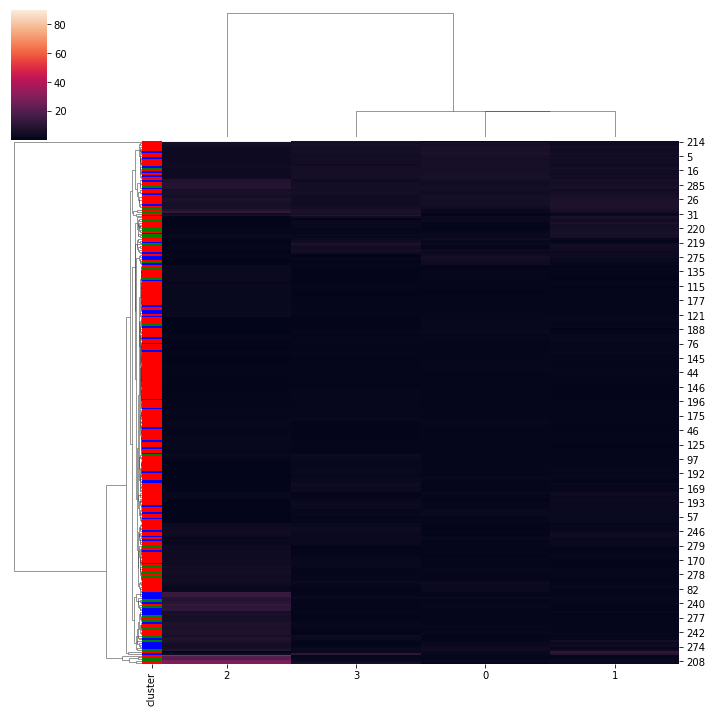

In [374]:
sns.clustermap(df2, row_colors=row_colors)

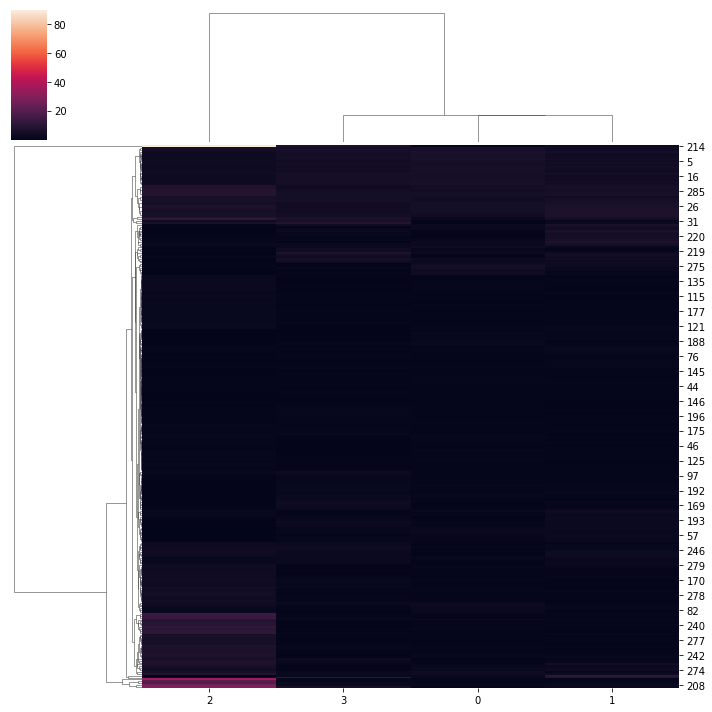

In [273]:
sns.clustermap(df2)

# ssGSEApy

In [377]:
!pip install gseapy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\Negin Rayaneh\\AppData\\Roaming\\Python\\Python39\\site-packages\\gseapy\\gse.cp39-win_amd64.pyd'
Check the permissions.

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [378]:
# %matplotlib inline
# %config InlineBackend.figure_format='retina' # mac
%load_ext autoreload
%autoreload 2
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [379]:
gp.__version__

'1.0.5'

In [380]:
from gseapy import Biomart
bm = Biomart()

In [381]:
## view validated marts
# marts = bm.get_marts()
## view validated dataset
# datasets = bm.get_datasets(mart='ENSEMBL_MART_ENSEMBL')
## view validated attributes
# attrs = bm.get_attributes(dataset='hsapiens_gene_ensembl')
## view validated filters
# filters = bm.get_filters(dataset='hsapiens_gene_ensembl')
## query results
queries ={'ensembl_gene_id': ['ENSG00000125285','ENSG00000182968'] } # need to be a dict object
results = bm.query(dataset='hsapiens_gene_ensembl',
                   attributes=['ensembl_gene_id', 'external_gene_name', 'entrezgene_id', 'go_id'],
                   filters=queries)
results.tail()

,ensembl_gene_id,external_gene_name,entrezgene_id,go_id
36,ENSG00000182968,SOX1,6656,GO:0021884
37,ENSG00000182968,SOX1,6656,GO:0030900
38,ENSG00000182968,SOX1,6656,GO:0048713
39,ENSG00000182968,SOX1,6656,GO:1904936
40,ENSG00000182968,SOX1,6656,GO:1990830


Enrichr API

See all supported enrichr library names

Select database from { ‘Human’, ‘Mouse’, ‘Yeast’, ‘Fly’, ‘Fish’, ‘Worm’ }

# default: Human

In [382]:
names = gp.get_library_name()
names[:10]

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021']

Parse Enrichr library into dict

## download library or read a .gmt file

In [383]:
go_mf = gp.get_library(name='GO_Molecular_Function_2018', organism='Yeast')
print(go_mf['ATP binding (GO:0005524)'])

['MLH1', 'ECM10', 'RLI1', 'SSB1', 'SSB2', 'YTA12', 'MSH2', 'CDC6', 'HMI1', 'YNL247W', 'MSH6', 'SSQ1', 'MCM7', 'SRS2', 'HSP104', 'SSA1', 'MCX1', 'SSC1', 'ARP2', 'ARP3', 'SSE1', 'SMC2', 'SSZ1', 'TDA10', 'ORC5', 'VPS4', 'RBK1', 'SSA4', 'NEW1', 'ORC1', 'SSA2', 'KAR2', 'SSA3', 'DYN1', 'PGK1', 'VPS33', 'LHS1', 'CDC123', 'PMS1']


Over-representation analysis by Enrichr web services

The only requirement of input is a list of gene symbols.

For online web services, gene symbols are not case sensitive.

    gene_list accepts
        pd.Series
        pd.DataFrame
        list object
        txt file (one gene symbol per row)

    gene_sets accepts:

    Multi-libraries names supported, separate each name by comma or input a list.

For example:

In [389]:
genes = pd.read_csv("E:/2023-08-10-AD-Pyroptosis-AI/microarray-data/gesa.csv")

In [390]:
genes

,genes
0,APOBEC1
1,APOBEC2
2,APOBEC3B
3,APOBEC3C
4,APOBEC3D
...,...
533,ZDHHC23
534,ZDHHC6
535,ZDHHC7
536,ZDHHC8P1


In [397]:
gsea_genes = genes.iloc[:].values.tolist()

In [398]:
gsea_genes

[['APOBEC1'],
 ['APOBEC2'],
 ['APOBEC3B'],
 ['APOBEC3C'],
 ['APOBEC3D'],
 ['APOBEC4'],
 ['ATG101'],
 ['ATG14'],
 ['ATG2A'],
 ['ATG4A'],
 ['ATG4C'],
 ['ATG4D'],
 ['ATG9A'],
 ['BCL2A1'],
 ['BCL2L12'],
 ['BHLHA15'],
 ['BHLHB9'],
 ['BHLHE23'],
 ['BIRC2'],
 ['BIRC7'],
 ['BNIPL'],
 ['BRD9'],
 ['BRDT'],
 ['BSG'],
 ['BST1'],
 ['BST2'],
 ['BTN2A3P'],
 ['CA11'],
 ['CA14'],
 ['CA2'],
 ['CA3'],
 ['CA5A'],
 ['CA7'],
 ['CA9'],
 ['CALM1'],
 ['CALML5'],
 ['CALML6'],
 ['CAPN11'],
 ['CAPN12'],
 ['CARD18'],
 ['CARD6'],
 ['CASP12'],
 ['CASP14'],
 ['CASP3'],
 ['CASP5'],
 ['CASP7'],
 ['CCL1'],
 ['CCL11'],
 ['CCL16'],
 ['CCL17'],
 ['CCL19'],
 ['CCL2'],
 ['CCL20'],
 ['CCL21'],
 ['CCL22'],
 ['CCL24'],
 ['CCL25'],
 ['CCL26'],
 ['CCL4'],
 ['CCL7'],
 ['CCL8'],
 ['CD27'],
 ['CDC37'],
 ['CDKN1A'],
 ['CDKN1B'],
 ['CEBPA'],
 ['CEBPA-AS1'],
 ['CEBPB'],
 ['CEBPE'],
 ['CEBPZ'],
 ['CHMP1A'],
 ['CHMP2A'],
 ['CHMP4C'],
 ['CHMP6'],
 ['CHMP7'],
 ['CITED1'],
 ['CITED4'],
 ['CLEC10A'],
 ['CLEC14A'],
 ['CLEC1A'],
 ['CLEC1B'],
 

In [ ]:
# gene_list
gene_list=gsea_genes,
gene_list=glist
# gene_sets
gene_sets='KEGG_2016'
gene_sets='KEGG_2016,KEGG_2013'
gene_sets=['KEGG_2016','KEGG_2013']

In [401]:
# Enrichr Web Serives (without a backgound input)

# if you are only intrested in dataframe that enrichr returned, please set outdir=None
enr = gp.enrichr(gene_list=genes, # or "./tests/data/gene_list.txt",
                 gene_sets=['MSigDB_Hallmark_2020','KEGG_2021_Human'],
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )

In [403]:
# obj.results stores all results
enr.results.head(5)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,MSigDB_Hallmark_2020,Interferon Gamma Response,29/200,1.377090e-13,2.111538e-12,0,0,6.427452,190.340210,CDKN1A;CXCL9;NLRC5;SECTM1;UBE2L6;IFI35;IFI44L;...
1,MSigDB_Hallmark_2020,Inflammatory Response,29/200,1.377090e-13,2.111538e-12,0,0,6.427452,190.340210,CXCL6;CDKN1A;CXCL9;HPN;IL18RAP;CCL7;CLEC5A;IL1...
2,MSigDB_Hallmark_2020,Allograft Rejection,29/200,1.377090e-13,2.111538e-12,0,0,6.427452,190.340210,CXCL9;CCL11;CXCL13;IL2RG;IL18RAP;CCL7;CCL4;STA...
3,MSigDB_Hallmark_2020,IL-6/JAK/STAT3 Signaling,18/87,1.414765e-11,1.626980e-10,0,0,9.728930,243.042989,IL15RA;CXCL9;IL4R;TNFRSF12A;IL10RB;CXCL1;CXCL1...
4,MSigDB_Hallmark_2020,TNF-alpha Signaling via NF-kB,23/200,5.011015e-09,4.610134e-08,0,0,4.865943,92.996082,STAT5A;IL15RA;CXCL6;CDKN1A;CEBPB;SERPINB2;BCL2...


2.2.4. Plotting

Show top 5 terms of each gene_set ranked by “Adjusted P-value”

In [404]:
# simple plotting function
from gseapy import barplot, dotplot

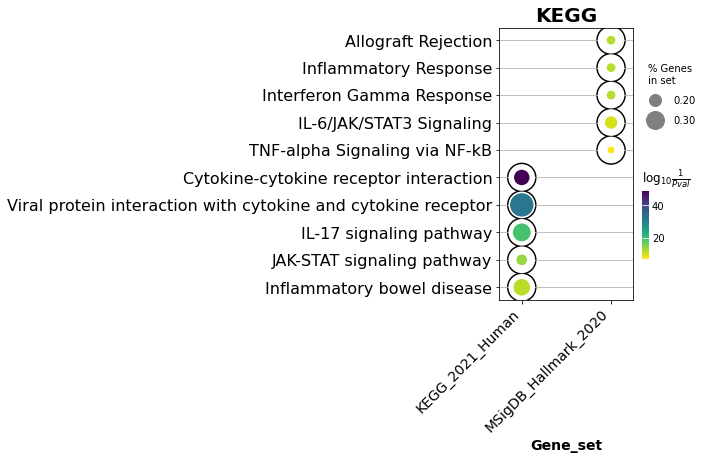

In [405]:
# categorical scatterplot
ax = dotplot(enr.results,
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=10,
              top_term=5,
              figsize=(3,5),
              title = "KEGG",
              xticklabels_rot=45, # rotate xtick labels
              show_ring=True, # set to False to revmove outer ring
              marker='o',
             )

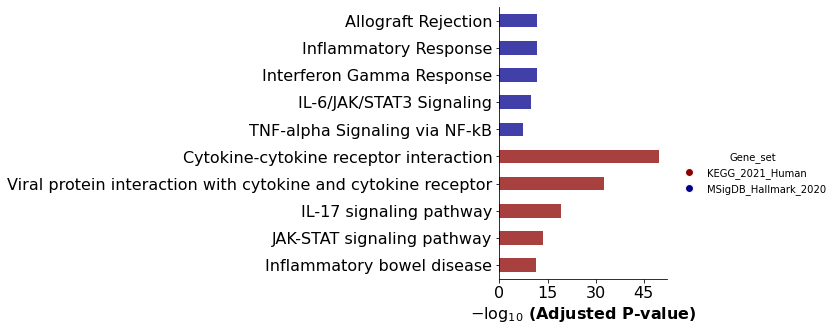

In [406]:
# categorical scatterplot
ax = barplot(enr.results,
              column="Adjusted P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=5,
              figsize=(3,5),
              color=['darkred', 'darkblue'] # set colors for group
             )

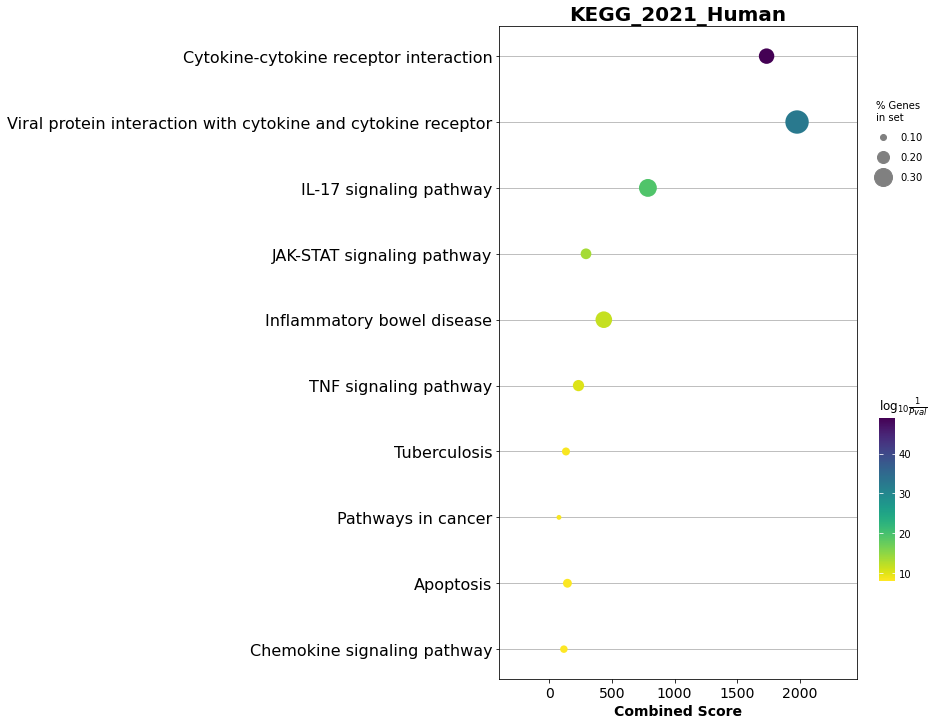

In [408]:
# to save your figure, make sure that ``ofname`` is not None
ax = dotplot(enr.res2d, title='KEGG_2021_Human',cmap='viridis_r', size=10, figsize=(8,12))

# Prerank example

In [413]:
rnk = pd.read_csv("E:/2023-08-10-AD-Pyroptosis-AI/microarray-data/prank.csv", index_col=0)
rnk.head()

,score
gene,
A1BG,5.871
A4GALT,4.565
A4GNT,3.204
AAAS,7.665
AACS,6.585


In [414]:
rnk.shape

(7005, 1)

In [416]:
# # run prerank
# # enrichr libraries are supported by prerank module. Just provide the name
# # use 4 process to acceralate the permutation speed
pre_res = gp.prerank(rnk=rnk, # or rnk = rnk,
                     gene_sets='KEGG_2016',
                     threads=4,
                     min_size=5,
                     max_size=1000,
                     permutation_num=1000, # reduce number to speed up testing
                     outdir=None, # don't write to disk
                     seed=6,
                     verbose=True, # see what's going on behind the scenes
                    )

2023-08-26 19:06:26,815 [WARNING] Duplicated values found in preranked stats: 39.11% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2023-08-26 19:06:26,830 [INFO] Parsing data files for GSEA.............................
2023-08-26 19:07:41,924 [INFO] Downloading and generating Enrichr library gene sets......
2023-08-26 19:07:53,787 [INFO] 0017 gene_sets have been filtered out when max_size=1000 and min_size=5
2023-08-26 19:07:53,797 [INFO] 0276 gene_sets used for further statistical testing.....
2023-08-26 19:07:53,797 [INFO] Start to run GSEA...Might take a while..................
2023-08-26 19:07:58,248 [INFO] Congratulations. GSEApy runs successfully................



In [417]:
pre_res.res2d.head(5)

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,Neuroactive ligand-receptor interaction Homo s...,-0.275669,-3.856319,0.0,0.0,0.0,114/126,58.19%,TAAR1;RXFP2;TAAR8;TAAR9;GABRR3;GABRA6;CHRNA9;T...
1,prerank,Olfactory transduction Homo sapiens hsa04740,-0.322797,-3.327444,0.0,0.0,0.0,51/65,34.26%,OR7A10;OR10A5;OR5P2;OR52A1;OR5K1;OR8D1;OR4D2;O...
2,prerank,Autoimmune thyroid disease Homo sapiens hsa05320,-0.56681,-2.894242,0.0,0.0,0.0,15/15,43.45%,IFNA16;IFNA10;IL5;CD40LG;IFNA14;TSHB;IFNA5;TPO...
3,prerank,Oxidative phosphorylation Homo sapiens hsa00190,0.537245,2.733914,0.0,0.0,0.0,30/49,19.14%,ATP5G1;ATP5B;PPA1;NDUFA12;ATP6AP1;SDHA;NDUFA3;...
4,prerank,Spliceosome Homo sapiens hsa03040,0.567702,2.717698,0.0,0.0,0.0,32/37,33.50%,HSPA2;DDX5;PRPF8;ACIN1;PRPF19;PCBP1;SF3A3;SF3B...


In [421]:
## easy way
#terms = pre_res.res2d.Term
#axs = pre_res.plot(terms=terms[1]) # v1.0.5
# to make more control on the plot, use
from gseapy import gseaplot
gseaplot(rank_metric=pre_res.ranking, term=terms[0], ofname='your.plot.png', **pre_res.results[terms[0]])

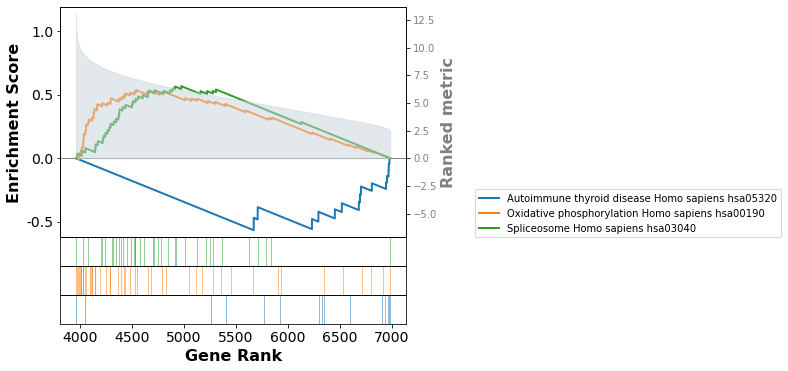

In [427]:
axs = pre_res.plot(terms=terms[1:5],
                   legend_kws={'loc': (1.2, 0)}, # set the legend loc
                   show_ranking=True, # whether to show the second yaxis
                   figsize=(15,18)
                  )
# or use this to have more control on the plot
#from gseapy import gseaplot2
#terms = pre_res.res2d.Term[1:5]
#hits = [pre_res.results[t]['hits'] for t in terms]
#runes = [pre_res.results[t]['RES'] for t in terms]
#fig = gseaplot2(terms=terms, ress=runes, hits=hits,
#               rank_metric=gs_res.ranking,
#               legend_kws={'loc': (1.2, 0)}, # set the legend loc
#               figsize=(8,10)) # rank_metric=pre_res.ranking